# 1. Build Fancy Softmax Classification

##### - 동물들의 특징 data 를 활용하여 동물 분류기를 구현

In [49]:
import tensorflow as tf
import numpy as np

In [50]:
# animal data load
data = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)

In [51]:
# 마지막 열을 제외한 모든 열(features)을 x_data 로 가져온다.
x_data = data[:, 0:-1]
# 데이터의 마지막 열(labels)을 y_data 로 가져온다.
y_data = data[:, -1:].astype(np.int32)

In [52]:
# data Test
print(len(x_data))
print(x_data.shape)
print(len(y_data))
print(y_data.shape)

101
(101, 16)
101
(101, 1)


In [53]:
# Y_one_hot encoding
# 총 0 ~ 6 까지의 동물 label 이 존재한다.
nb_classes = 7
# one_hot() 이후 y_data 의 shape = (101, 1, 7)
Y_one_hot = tf.one_hot(y_data, nb_classes)
# reshape() 이후 y_data 의 shape = (101, 7)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])

In [54]:
# Set weight and bias
# x_data 의 shape = (101, 16) 이므로 weight 의 shape = (16, ?)
# y_data 의 classes 가 7 개이므로 weight 의 shape = (16, 7)
W = tf.Variable(tf.random.normal([16, nb_classes]), name = 'weight')
# WX + b 에서 WX 의 shape 이 (101, 7) 이므로 b 의 shape = (7)
b = tf.Variable(tf.random.normal([nb_classes]), name = 'bias')

In [55]:
# logits
def logits(features):
    return tf.matmul(features, W) + b

In [56]:
# Fancy cross-entropy cost function
def cross_entropy(features, labels):
    Logits = logits(features)
    cost_i = tf.nn.softmax_cross_entropy_with_logits(logits = Logits, labels = labels)
    cost = tf.reduce_mean(cost_i)
    return cost

In [57]:
def grad(features, labels):
    with tf.GradientTape() as tape:
        cost = cross_entropy(features, labels)
    return tape.gradient(cost, [W, b])

In [58]:
# model 이 예측한 logits 를 argmax()로 One_hot encoding
# One_hot encoding 한 결과(index)와 Y_one_hot 의 argmax()결과(index)를 비교하여 accuracy 를 측정한다
def prediction(features, labels):
    predict = tf.argmax(logits(features), 1)
    is_correct_prediction = tf.equal(predict, tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))
    return accuracy

In [59]:
# Set optimizer with learning_rate = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)

In [61]:
EPOCHS = 2000

for i in range(EPOCHS + 1):
    grads = grad(x_data, Y_one_hot)
    optimizer.apply_gradients(grads_and_vars = zip(grads, [W, b]))
    
    if (i == 0) or (i % 100 == 0):
        cost = cross_entropy(x_data, Y_one_hot)
        accuracy = prediction(x_data, Y_one_hot).numpy()
        print('Epoch: {} | Cost: {} | Accuracy: {}%'.format(i, cost, accuracy * 100))

Epoch: 0 | Cost: 0.3593686521053314 | Accuracy: 92.07921028137207%
Epoch: 100 | Cost: 0.3477221429347992 | Accuracy: 92.07921028137207%
Epoch: 200 | Cost: 0.33690717816352844 | Accuracy: 92.07921028137207%
Epoch: 300 | Cost: 0.326835960149765 | Accuracy: 92.07921028137207%
Epoch: 400 | Cost: 0.31743326783180237 | Accuracy: 93.06930899620056%
Epoch: 500 | Cost: 0.3086336851119995 | Accuracy: 93.06930899620056%
Epoch: 600 | Cost: 0.30038022994995117 | Accuracy: 93.06930899620056%
Epoch: 700 | Cost: 0.29262247681617737 | Accuracy: 93.06930899620056%
Epoch: 800 | Cost: 0.28531578183174133 | Accuracy: 93.06930899620056%
Epoch: 900 | Cost: 0.2784205377101898 | Accuracy: 93.06930899620056%
Epoch: 1000 | Cost: 0.2719011902809143 | Accuracy: 94.05940771102905%
Epoch: 1100 | Cost: 0.26572585105895996 | Accuracy: 94.05940771102905%
Epoch: 1200 | Cost: 0.2598660886287689 | Accuracy: 94.05940771102905%
Epoch: 1300 | Cost: 0.2542961537837982 | Accuracy: 94.05940771102905%
Epoch: 1400 | Cost: 0.24899

***
# 2. Explanation

#### Data
- 먼저 입력된 data(data-04-zoo.csv) 에 대해 소개한다.
<br>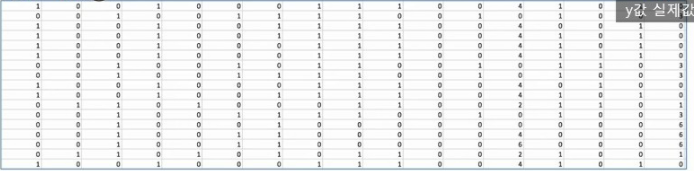
<br>
- 위와 같이 ',' 으로 구분된 csv 파일을 사용하였다.
- 총 16 개의 column(features)로 이루어져 있으며,
- 가장 마지막 column 은 0 ~ 6, 총 7 개의 classes 로 구성된 label 이다.

#### One_hot
<br>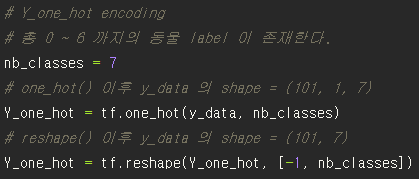

- One_hot 함수를 사용하여 각각 0 ~ 6 의 수치로 이루어진 y_data(label)를 One-hot-encoding 한다.
- 아래와 같이 값이 one-hot-encoding 된다.
    * ex) [[3], [0]] (2 dim) --> [[[0 0 0 1 0 0 0]], [[1 0 0 0 0 0 0]]] (3 dim)
<br>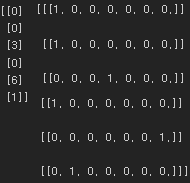
<br>
- 각 label 값이 정상적으로 one-hot-encoding 되긴하지만 차원이 하나 늘어난다는 문제점이 있다.
- 위 사진에서 초기 y_data 는 2차원이지만 One_hot 이후 3차원으로 변경된 것을 확인할 수 있다.
- 따라서, reshape 함수를 통해 shape을 2차원인 (-1, 7) 로 변경해주어야 한다.
- reshape 함수에서 shape 에 쓰인 -1 은 값을 지정하지 않음을 뜻한다.

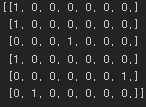
- reshape 함수를 통해 정상적인 2차원 배열의 형태를 갖추었으며,
- one_hot 함수를 통해 손쉽게 label 을 one-hot-encoding 할 수 있었다.

#### logits
- 다음은 logits 함수에 대한 설명이다.
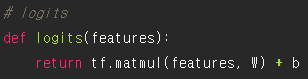

- 위 사진에서처럼 logits 는 WX + b 의 전형적인 Hypothesis 의 형태를 띈다.
<br>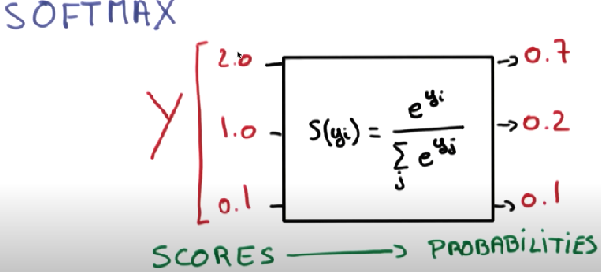
<br>
- 이는 저번 포스트에서 [scores - softmax function - probabilities] 의 과정에서 score 를 뜻한다.
- 즉, softmax function 에 들어가기 전, WX + b 의 Hypothesis 의 기본적인 형태인 것이다.

#### softmax_cross_entropy_with_logits
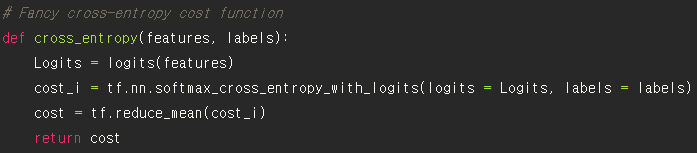

- 이후 구해진 logits 를 softmax_cross_entropy_with_logits 함수에 넣어 손쉽게 cost 를 구할 수 있다.
<br> 
<br>
- 저번 포스트에서 구현한 위의 복잡한 수식을 함수 하나로 해결해낼 수 있다.

#### Prediction
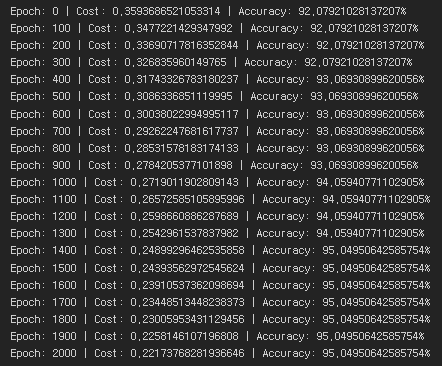
<br>
- EPOCH 가 늘어날수록, cost 는 줄어들어 0 에 수렴하고, accuracy 도 95% 가 나와주었다.